In [3]:
import pandas as pd
import geopandas as gpd

RNAL = pd.read_csv("../python/final/porto.csv")
RNAL["NrRNAL"] = RNAL["NrRNAL"].astype(str)
RNAL.head()

,Unnamed: 0,X,Y,OBJECTID,NrRNAL,Denominacao,DataRegisto,DataAberturaPublico,Modalidade,NrUtentes,Email,Endereco,CodigoPostal,Freguesia,Concelho,Distrito
0,100,-8.630320,41.158010,185476533,519,Koolhouse Porto,2014/12/05 10:19:59+00,2014/12/05 00:00:00+00,EstabelecimentoHospedagem,23,kendall.faria@gmail.com,Avenida Avenida Boavista 911,4100-128,"União das freguesias de Cedofeita, Santo Ildef...",Porto,Porto
1,293,-8.602860,41.144624,185476726,14,Centenry Fontaínhas Apartments 1,2014/12/01 09:40:52+00,2014/12/01 00:00:00+00,Apartamento,6,apcf.pc@gmail.com,Rua Fontaínhas 167 1.º,4000-240,"União das freguesias de Cedofeita, Santo Ildef...",Porto,Porto
2,294,-8.602860,41.144624,185476727,15,Centenry Fontaínhas Apartments 1,2014/12/01 09:56:17+00,2014/12/01 00:00:00+00,Apartamento,6,apcf.pc@gmail.com,Rua Fontaínhas 167,4000-240,"União das freguesias de Cedofeita, Santo Ildef...",Porto,Porto
3,295,-8.602860,41.144624,185476728,16,Centenry Fontaínhas Apartments 3,2014/12/01 10:04:00+00,2014/12/01 00:00:00+00,Apartamento,6,apcf.pc@gmail.com,Rua Fontaínhas 167 3.º,4000-240,"União das freguesias de Cedofeita, Santo Ildef...",Porto,Porto
4,296,-8.614323,41.142069,185476729,32,inPátio Guest House,2014/12/01 16:41:53+00,2012/09/10 00:00:00+00,EstabelecimentoHospedagem,12,info@inpatio.pt,Pátio São Salvador 22,4050-567,"União das freguesias de Cedofeita, Santo Ildef...",Porto,Porto


In [5]:
input_file = "BGRI/BGRI.gpkg"
BGRI = gpd.read_file(input_file)
BGRI = BGRI.to_crs("EPSG:4326")
BGRI.head()

,OBJECTID,BGRI2021,DT21,DTMN21,DTMNFR21,DTMNFRSEC21,SECNUM21,SSNUM21,SECSSNUM21,SUBSECCAO,...,N_INDIVIDUOS,N_INDIVIDUOS_H,N_INDIVIDUOS_M,N_INDIVIDUOS_0_14,N_INDIVIDUOS_15_24,N_INDIVIDUOS_25_64,N_INDIVIDUOS_65_OU_MAIS,SHAPE_Length,SHAPE_Area,geometry
0,52,13121000702,13,1312,131210,131210007,007,02,00702,13121000702,...,328.0,145.0,183.0,29.0,34.0,184.0,81.0,612.308514,21064.473451,"MULTIPOLYGON (((-40792.851 166989.435, -40733...."
1,53,13120302118,13,1312,131203,131203021,021,18,02118,13120302118,...,134.0,54.0,80.0,8.0,10.0,55.0,61.0,481.233389,13437.276410,"MULTIPOLYGON (((-37680.254 167001.264, -37667...."
2,54,13121103402,13,1312,131211,131211034,034,02,03402,13121103402,...,143.0,67.0,76.0,15.0,8.0,79.0,41.0,707.178859,13484.048739,"MULTIPOLYGON (((-43406.159 166894.230, -43347...."
3,55,13121600903,13,1312,131216,131216009,009,03,00903,13121600903,...,205.0,89.0,116.0,33.0,12.0,100.0,60.0,824.199641,24498.620921,"MULTIPOLYGON (((-45059.181 166999.619, -45056...."
4,56,13121600403,13,1312,131216,131216004,004,03,00403,13121600403,...,5.0,2.0,3.0,0.0,1.0,2.0,2.0,177.035284,1829.033862,"MULTIPOLYGON (((-43954.343 166993.913, -43965...."


In [16]:

points_gdf = gpd.GeoDataFrame(RNAL, geometry=gpd.points_from_xy(RNAL['X'], RNAL['Y']), crs="EPSG:4326")
points_in_areas = gpd.sjoin(points_gdf, BGRI, how='left', op='within')

# Count the points in each area
point_counts = points_in_areas.groupby('BGRI2021').size().reset_index(name='point_count')


        BGRI2021  point_count
0    13120200101           21
1    13120200104           28
2    13120200105            1
3    13120200106            3
4    13120200107           34
..           ...          ...
809  13121802505            1
810  13121802506            5
811  13121802510            4
812  13121802511            8
813  13121802512            1

[814 rows x 2 columns]


/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
point_counts["point_count"].value_counts()

point_count
1     209
2     108
3      67
4      46
5      43
     ... 
41      1
57      1
74      1
93      1
50      1
Name: count, Length: 84, dtype: int64

In [20]:
merged_df = pd.merge(BGRI, point_counts, on='BGRI2021', how='left')

# Fill NaN values with 0 in the 'number_of_inhabitants' column
merged_df['point_count'] = merged_df['point_count'].fillna(0)

In [23]:
merged_df = merged_df.rename(columns={"point_count":"ALs"})

In [134]:
merged_df["pressao"] = merged_df["ALs"] / merged_df["N_ALOJAMENTOS_FAMILIARES"]

In [32]:
merged_df["N_ALOJAMENTOS_FAMILIARES"].value_counts()

N_ALOJAMENTOS_FAM_CLASS_RHABITUAL
0.0      63
12.0     39
9.0      33
6.0      33
8.0      29
         ..
233.0     1
179.0     1
296.0     1
154.0     1
175.0     1
Name: count, Length: 257, dtype: int64

In [34]:
merged_df.to_csv("heatmap.csv")

In [35]:
merged_df.columns
merged_df = merged_df.drop("index_right", axis = 1)


Index(['OBJECTID', 'BGRI2021', 'DT21', 'DTMN21', 'DTMNFR21', 'DTMNFRSEC21',
       'SECNUM21', 'SSNUM21', 'SECSSNUM21', 'SUBSECCAO', 'NUTS1', 'NUTS2',
       'NUTS3', 'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ',
       'N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS',
       'N_EDIFICIOS_EXCLUSIV_RESID', 'N_EDIFICIOS_1_OU_2_PISOS',
       'N_EDIFICIOS_3_OU_MAIS_PISOS', 'N_EDIFICIOS_CONSTR_ANTES_1945',
       'N_EDIFICIOS_CONSTR_1946_1980', 'N_EDIFICIOS_CONSTR_1981_2000',
       'N_EDIFICIOS_CONSTR_2001_2010', 'N_EDIFICIOS_CONSTR_2011_2021',
       'N_EDIFICIOS_COM_NECESSIDADES_REPARACAO', 'N_ALOJAMENTOS_TOTAL',
       'N_ALOJAMENTOS_FAMILIARES', 'N_ALOJAMENTOS_FAM_CLASS_RHABITUAL',
       'N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA',
       'N_RHABITUAL_ACESSIVEL_CADEIRAS_RODAS',
       'N_RHABITUAL_COM_ESTACIONAMENTO', 'N_RHABITUAL_PROP_OCUP',
       'N_RHABITUAL_ARRENDADOS', 'N_AGREGADOS_DOMESTICOS_PRIVADOS',
       'N_ADP_1_OU_2_PESSOAS', 'N_ADP_3_OU_MAIS_PE

In [62]:
input_file = "CAOP/CAOP.gpkg"
CAOP = gpd.read_file(input_file)
CAOP = CAOP[CAOP["Concelho"] == "Porto"][["Freguesia", "geometry"]]
CAOP = CAOP.to_crs("EPSG:4326")
CAOP.head()

,Freguesia,geometry
928,Ramalde,"MULTIPOLYGON (((-8.62268 41.18025, -8.62278 41..."
932,Paranhos,"MULTIPOLYGON (((-8.59688 41.18375, -8.59683 41..."
2229,União das freguesias de Lordelo do Ouro e Mass...,"MULTIPOLYGON (((-8.63594 41.15976, -8.63587 41..."
2233,Bonfim,"MULTIPOLYGON (((-8.58820 41.16705, -8.58839 41..."
2234,"União das freguesias de Cedofeita, Santo Ildef...","MULTIPOLYGON (((-8.60412 41.16182, -8.60400 41..."


In [63]:
intersections = gpd.overlay(merged_df, CAOP, how='intersection')
# Calculate the area of each intersection
intersections['intersection_area'] = intersections['geometry'].area

# Find the county with the maximum intersection area for each small section
idx = intersections.groupby('BGRI2021')['intersection_area'].idxmax()

# Create a new DataFrame with only the small section name and county name
result_df = intersections.loc[idx, ['BGRI2021', 'Freguesia']]

# Display the result
print(result_df)

         BGRI2021                                          Freguesia
1726  13120200101                                             Bonfim
1732  13120200102                                             Bonfim
1687  13120200103                                             Bonfim
1688  13120200104                                             Bonfim
1734  13120200105                                             Bonfim
...           ...                                                ...
1531  13121802508  União das freguesias de Lordelo do Ouro e Mass...
1653  13121802509  União das freguesias de Lordelo do Ouro e Mass...
1525  13121802510  União das freguesias de Lordelo do Ouro e Mass...
1533  13121802511  União das freguesias de Lordelo do Ouro e Mass...
1512  13121802512  União das freguesias de Lordelo do Ouro e Mass...

[1659 rows x 2 columns]


/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/var/folders/2_/dc69y37n7d14q5rbg8ly14g40000gn/T/ipykernel_38402/1137887932.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 387 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersections = gpd.overlay(merged_df, CAOP, how='intersection')
/var/folders/2_/dc69y37n7d14q5rbg8ly14g40000gn/T/ipykernel_38402/1137887932.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersections['intersection_area'] = intersections['geometry'].area


In [83]:
result_df["BGRI2021"] = result_df["BGRI2021"].astype(int).reindex("BGRI2021")
merged_df["BGRI2021"] = merged_df["BGRI2021"].astype(int).set_index("BGRI2021")

TypeError: Index(...) must be called with a collection of some kind, 'BGRI2021' was passed

In [87]:
merged_df = merged_df.join(result_df, on="BGRI2021", how="left")

In [86]:
result_df = result_df.set_index("BGRI2021")

In [89]:
merged_df.to_csv("seccoes.csv")

In [95]:
merged_df.groupby("Freguesia")["N_ALOJAMENTOS_FAMILIARES"].agg("sum")

Freguesia
Bonfim                                                                                     14802.0
Campanhã                                                                                   16022.0
Paranhos                                                                                   27439.0
Ramalde                                                                                    19126.0
União das freguesias de Aldoar, Foz do Douro e Nevogilde                                   14054.0
União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória    26979.0
União das freguesias de Lordelo do Ouro e Massarelos                                       14939.0
Name: N_ALOJAMENTOS_FAMILIARES, dtype: float64

In [96]:
merged_df.groupby("Freguesia")["ALs"].agg("sum") / merged_df.groupby("Freguesia")["N_ALOJAMENTOS_FAMILIARES"].agg("sum")

Freguesia
Bonfim                                                                                     0.095798
Campanhã                                                                                   0.013107
Paranhos                                                                                   0.013375
Ramalde                                                                                    0.008000
União das freguesias de Aldoar, Foz do Douro e Nevogilde                                   0.017504
União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória    0.279551
União das freguesias de Lordelo do Ouro e Massarelos                                       0.035277
dtype: float64

In [121]:
input_file = "CAOP/CAOP2011.shp"
CAOP11 = gpd.read_file(input_file)
CAOP11 = CAOP11[CAOP11["MUNICIPIO"] == "PORTO"][["FREGUESIA", "geometry"]]
CAOP11 = CAOP11.to_crs("EPSG:4326")
CAOP11.head()

,FREGUESIA,geometry
2125,CAMPANHÃ,"POLYGON ((-8.56821 41.17755, -8.56783 41.17728..."
2126,ALDOAR,"POLYGON ((-8.66185 41.17696, -8.66154 41.17692..."
2135,RAMALDE,"POLYGON ((-8.63266 41.17926, -8.63240 41.17921..."
2141,PARANHOS,"POLYGON ((-8.60353 41.18586, -8.60237 41.18526..."
2983,MASSARELOS,"POLYGON ((-8.63565 41.15900, -8.63327 41.15861..."


In [122]:
intersections = gpd.overlay(merged_df, CAOP, how='intersection')
intersections['intersection_area'] = intersections['geometry'].area
idx = intersections.groupby('BGRI2021')['intersection_area'].idxmax()
result_df = intersections.loc[idx, ['BGRI2021', 'FREGUESIA']]
print(result_df)

         BGRI2021        FREGUESIA
1217  13120200101           BONFIM
1223  13120200102           BONFIM
1175  13120200103           BONFIM
1176  13120200104           BONFIM
1225  13120200105           BONFIM
...           ...              ...
1620  13121802508  LORDELO DO OURO
1701  13121802509  LORDELO DO OURO
1617  13121802510  LORDELO DO OURO
1621  13121802511  LORDELO DO OURO
1608  13121802512  LORDELO DO OURO

[1659 rows x 2 columns]


/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/var/folders/2_/dc69y37n7d14q5rbg8ly14g40000gn/T/ipykernel_38402/1373537385.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 449 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersections = gpd.overlay(merged_df, CAOP, how='intersection')
/var/folders/2_/dc69y37n7d14q5rbg8ly14g40000gn/T/ipykernel_38402/1373537385.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersections['intersection_area'] = intersections['geometry'].area


In [123]:
result_df["BGRI2021"] = result_df["BGRI2021"].astype(int).reindex("BGRI2021")
merged_df["BGRI2021"] = merged_df["BGRI2021"].astype(int).set_index("BGRI2021")

TypeError: Index(...) must be called with a collection of some kind, 'BGRI2021' was passed

In [124]:
result_df = result_df.set_index("BGRI2021")

In [126]:
result_df = result_df.rename(columns={"FREGUESIA":"Freguesia2011"})

In [129]:
merged_df = merged_df.join(result_df, on="BGRI2021", how="left")

In [135]:
merged_df.to_csv("seccoes-final.csv")

In [133]:
merged_df.groupby("Freguesia2011")["ALs"].agg("sum") / merged_df.groupby("Freguesia2011")["N_ALOJAMENTOS_FAMILIARES"].agg("sum") * 100

Freguesia2011
ALDOAR              0.499500
BONFIM              9.579787
CAMPANHÃ            1.310698
CEDOFEITA          11.604575
FOZ DO DOURO        3.370787
LORDELO DO OURO     1.314918
MASSARELOS          8.882784
MIRAGAIA           26.466165
NEVOGILDE           1.260023
PARANHOS            1.337512
RAMALDE             0.799958
SANTO ILDEFONSO    42.279185
SÃO NICOLAU        58.264463
SÉ                 57.345491
VITÓRIA            79.765625
dtype: float64

In [138]:
input_file = "BGRI/BGRI2011.gpkg"
BGRI11 = gpd.read_file(input_file)
BGRI11 = BGRI11.to_crs("EPSG:4326")

input_file = "CAOP/CAOP2011.shp"
CAOP11 = gpd.read_file(input_file)
CAOP11 = CAOP11[CAOP11["MUNICIPIO"] == "PORTO"][["FREGUESIA", "geometry"]]
CAOP11 = CAOP11.to_crs("EPSG:4326")

intersections = gpd.overlay(BGRI11, CAOP, how='intersection')
intersections['intersection_area'] = intersections['geometry'].area
idx = intersections.groupby('BGRI11')['intersection_area'].idxmax()
result_df = intersections.loc[idx, ['BGRI11', 'FREGUESIA']]
result_df = result_df.set_index("BGRI11")

           BGRI11 FREGUESIA
2275  13120100101    ALDOAR
2267  13120100102    ALDOAR
2265  13120100103    ALDOAR
2264  13120100104    ALDOAR
2261  13120100105    ALDOAR
...           ...       ...
1650  13121500501   VITÓRIA
1646  13121500502   VITÓRIA
1645  13121500503   VITÓRIA
1644  13121500504   VITÓRIA
1649  13121500505   VITÓRIA

[1946 rows x 2 columns]


/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/var/folders/2_/dc69y37n7d14q5rbg8ly14g40000gn/T/ipykernel_38402/466768929.py:10: UserWarning: `keep_geom_type=True` in overlay resulted in 466 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersections = gpd.overlay(BGRI11, CAOP, how='intersection')
/var/folders/2_/dc69y37n7d14q5rbg8ly14g40000gn/T/ipykernel_38402/466768929.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersections['intersection_area'] = intersections['geometry'].area


In [142]:
BGRI11 = BGRI11.join(result_df, on="BGRI11", how="left")

In [143]:
BGRI11.head()

,OBJECTID,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,OBJECTID_12,ANO,...,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,geometry,FREGUESIA
0,1622,1312,03,023,03,13120302303,007437,Porto,199611,2011,...,15,17,22,1,2,12,3,11,"MULTIPOLYGON (((-8.58358 41.15600, -8.58312 41...",CAMPANHÃ
1,1623,1312,03,011,07,13120301107,007437,Porto,199535,2011,...,54,32,64,0,8,46,33,43,"MULTIPOLYGON (((-8.57698 41.16734, -8.57653 41...",CAMPANHÃ
2,1624,1312,03,008,04,13120300804,007437,Porto,199513,2011,...,2,10,13,0,2,0,1,1,"MULTIPOLYGON (((-8.57378 41.16735, -8.57421 41...",CAMPANHÃ
3,1625,1312,03,018,05,13120301805,007437,Porto,199575,2011,...,4,6,6,0,0,4,2,3,"MULTIPOLYGON (((-8.57221 41.16434, -8.57211 41...",CAMPANHÃ
4,1626,1312,03,034,03,13120303403,007437,Porto,199660,2011,...,133,100,165,1,23,109,56,93,"MULTIPOLYGON (((-8.56800 41.15866, -8.56807 41...",CAMPANHÃ


In [177]:
list(BGRI11.columns)

['OBJECTID',
 'DTMN11',
 'FR11',
 'SEC11',
 'SS11',
 'BGRI11',
 'LUG11',
 'LUG11DESIG',
 'OBJECTID_12',
 'ANO',
 'GEO_COD',
 'GEO_COD_DSG',
 'NIVEL',
 'NIVEL_DSG',
 'N_EDIFICIOS_CLASSICOS',
 'N_EDIFICIOS_CLASSICOS_1OU2',
 'N_EDIFICIOS_CLASSICOS_ISOLADOS',
 'N_EDIFICIOS_CLASSICOS_GEMIN',
 'N_EDIFICIOS_CLASSICOS_EMBANDA',
 'N_EDIFICIOS_CLASSICOS_3OUMAIS',
 'N_EDIFICIOS_CLASSICOS_OUTROS',
 'N_EDIFICIOS_EXCLUSIV_RESID',
 'N_EDIFICIOS_PRINCIPAL_RESID',
 'N_EDIFICIOS_PRINCIP_NAO_RESID',
 'N_EDIFICIOS_1OU2_PISOS',
 'N_EDIFICIOS_3OU4_PISOS',
 'F_N_EDIFICIOS_5OU_MAIS_PISOS',
 'N_EDIFICIOS_CONSTR_ANTES_1919',
 'N_EDIFICIOS_CONSTR_1919A1945',
 'N_EDIFICIOS_CONSTR_1946A1960',
 'N_EDIFICIOS_CONSTR_1961A1970',
 'N_EDIFICIOS_CONSTR_1971A1980',
 'N_EDIFICIOS_CONSTR_1981A1990',
 'N_EDIFICIOS_CONSTR_1991A1995',
 'N_EDIFICIOS_CONSTR_1996A2000',
 'N_EDIFICIOS_CONSTR_2001A2005',
 'N_EDIFICIOS_CONSTR_2006A2011',
 'N_EDIFICIOS_ESTRUT_BETAO',
 'N_EDIFICIOS_ESTRUT_COM_PLACA',
 'N_EDIFICIOS_ESTRUT_SEM_PLACA',
 

In [192]:
reabilitacao11 = BGRI11.groupby("FREGUESIA")[["N_ALOJAMENTOS_FAMILIARES","N_INDIVIDUOS_RESIDENT"]].agg("sum")
reabilitacao11.head(15)

,N_ALOJAMENTOS_FAMILIARES,N_INDIVIDUOS_RESIDENT
FREGUESIA,,
ALDOAR,5843,12843
BONFIM,14993,24265
CAMPANHÃ,16431,32659
CEDOFEITA,15711,22077
FOZ DO DOURO,5701,10997
LORDELO DO OURO,10919,22270
MASSARELOS,4380,6789
MIRAGAIA,1522,2067
NEVOGILDE,2460,5018


In [195]:
reabilitacao21 = merged_df.groupby("Freguesia2011")[["N_ALOJAMENTOS_FAMILIARES","N_INDIVIDUOS", "ALs"]].agg("sum")
reabilitacao21.head(15)

,N_ALOJAMENTOS_FAMILIARES,N_INDIVIDUOS,ALs
Freguesia2011,,,
ALDOAR,6006.0,13487.0,30.0
BONFIM,14802.0,22978.0,1418.0
CAMPANHÃ,16022.0,29666.0,210.0
CEDOFEITA,14951.0,22847.0,1735.0
FOZ DO DOURO,5429.0,10410.0,183.0
LORDELO DO OURO,10571.0,21358.0,139.0
MASSARELOS,4368.0,6553.0,388.0
MIRAGAIA,1330.0,1571.0,352.0
NEVOGILDE,2619.0,5188.0,33.0


In [196]:
reab = reabilitacao11.join(reabilitacao21, how="left", lsuffix="11", rsuffix="21")
reab.head()

,N_ALOJAMENTOS_FAMILIARES11,N_INDIVIDUOS_RESIDENT,N_ALOJAMENTOS_FAMILIARES21,N_INDIVIDUOS,ALs
FREGUESIA,,,,,
ALDOAR,5843,12843,6006.0,13487.0,30.0
BONFIM,14993,24265,14802.0,22978.0,1418.0
CAMPANHÃ,16431,32659,16022.0,29666.0,210.0
CEDOFEITA,15711,22077,14951.0,22847.0,1735.0
FOZ DO DOURO,5701,10997,5429.0,10410.0,183.0


In [204]:
reab["diff_aloj"] = reab["N_ALOJAMENTOS_FAMILIARES21"] - reab["N_ALOJAMENTOS_FAMILIARES11"]
reab["diff_pop"] = reab["N_INDIVIDUOS"] - reab["N_INDIVIDUOS_RESIDENT"]
reab["diff_alojamentos_%"] = reab["diff_aloj"] / reab["N_ALOJAMENTOS_FAMILIARES11"] * 100
reab["diff_populacao_%"] = reab["diff_pop"] / reab["N_INDIVIDUOS_RESIDENT"]* 100
reab["racio_ALs_%"] = reab["ALs"] / reab["N_ALOJAMENTOS_FAMILIARES21"] * 100
#reab["diff_vagos"] = reab["N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA"] - reab["N_ALOJAMENTOS_VAGOS"]
#reab["diff_vagos_%"] = reab["diff_vagos"] / reab["N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA"] * 100


In [205]:
reab[["diff_alojamentos_%", "diff_populacao_%", "racio_ALs_%"]].round(2)

,diff_alojamentos_%,diff_populacao_%,racio_ALs_%
FREGUESIA,,,
ALDOAR,2.79,5.01,0.50
BONFIM,-1.27,-5.30,9.58
CAMPANHÃ,-2.49,-9.16,1.31
CEDOFEITA,-4.84,3.49,11.60
FOZ DO DOURO,-4.77,-5.34,3.37
LORDELO DO OURO,-3.19,-4.10,1.31
MASSARELOS,-0.27,-3.48,8.88
MIRAGAIA,-12.61,-24.00,26.47
NEVOGILDE,6.46,3.39,1.26


In [181]:
BGRI["N_ALOJAMENTOS_FAMILIARES"].sum()

137371

In [183]:
input_file = "BGRI/BGRI2021_Lisboa.gpkg"
BGRI21_lx = gpd.read_file(input_file)
BGRI21_lx = BGRI21_lx.to_crs("EPSG:4326")
BGRI21_lx.head()

,OBJECTID,BGRI2021,DT21,DTMN21,DTMNFR21,DTMNFRSEC21,SECNUM21,SSNUM21,SECSSNUM21,SUBSECCAO,...,N_INDIVIDUOS,N_INDIVIDUOS_H,N_INDIVIDUOS_M,N_INDIVIDUOS_0_14,N_INDIVIDUOS_15_24,N_INDIVIDUOS_25_64,N_INDIVIDUOS_65_OU_MAIS,SHAPE_Length,SHAPE_Area,geometry
0,30243,11065602301,11,1106,110656,110656023,023,01,02301,11065602301,...,202.0,106.0,96.0,14.0,31.0,127.0,30.0,409.853268,9657.766943,"MULTIPOLYGON (((-9.13148 38.73385, -9.13138 38..."
1,30244,11065700203,11,1106,110657,110657002,002,03,00203,11065700203,...,197.0,75.0,122.0,26.0,24.0,85.0,62.0,368.048569,8445.226728,"MULTIPOLYGON (((-9.14729 38.73396, -9.14768 38..."
2,30311,11065801011,11,1106,110658,110658010,010,11,01011,11065801011,...,21.0,12.0,9.0,4.0,5.0,9.0,3.0,239.674582,2582.412127,"MULTIPOLYGON (((-9.21853 38.69908, -9.21934 38..."
3,30312,11065801012,11,1106,110658,110658010,010,12,01012,11065801012,...,20.0,8.0,12.0,4.0,2.0,7.0,7.0,250.811945,3077.844919,"MULTIPOLYGON (((-9.21995 38.69920, -9.22085 38..."
4,30313,11065801013,11,1106,110658,110658010,010,13,01013,11065801013,...,22.0,9.0,13.0,7.0,3.0,8.0,4.0,238.956181,2555.620562,"MULTIPOLYGON (((-9.21872 38.69926, -9.21956 38..."


In [185]:
BGRI21_lx["N_ALOJAMENTOS_FAMILIARES"].sum()

319739.0

In [186]:
BGRI21_lx["N_ALOJAMENTOS_FAM_CLASS_RHABITUAL"].sum()

242044.0

In [194]:
list(BGRI.columns)

['OBJECTID',
 'BGRI2021',
 'DT21',
 'DTMN21',
 'DTMNFR21',
 'DTMNFRSEC21',
 'SECNUM21',
 'SSNUM21',
 'SECSSNUM21',
 'SUBSECCAO',
 'NUTS1',
 'NUTS2',
 'NUTS3',
 'N_EDIFICIOS_CLASSICOS',
 'N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ',
 'N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS',
 'N_EDIFICIOS_EXCLUSIV_RESID',
 'N_EDIFICIOS_1_OU_2_PISOS',
 'N_EDIFICIOS_3_OU_MAIS_PISOS',
 'N_EDIFICIOS_CONSTR_ANTES_1945',
 'N_EDIFICIOS_CONSTR_1946_1980',
 'N_EDIFICIOS_CONSTR_1981_2000',
 'N_EDIFICIOS_CONSTR_2001_2010',
 'N_EDIFICIOS_CONSTR_2011_2021',
 'N_EDIFICIOS_COM_NECESSIDADES_REPARACAO',
 'N_ALOJAMENTOS_TOTAL',
 'N_ALOJAMENTOS_FAMILIARES',
 'N_ALOJAMENTOS_FAM_CLASS_RHABITUAL',
 'N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA',
 'N_RHABITUAL_ACESSIVEL_CADEIRAS_RODAS',
 'N_RHABITUAL_COM_ESTACIONAMENTO',
 'N_RHABITUAL_PROP_OCUP',
 'N_RHABITUAL_ARRENDADOS',
 'N_AGREGADOS_DOMESTICOS_PRIVADOS',
 'N_ADP_1_OU_2_PESSOAS',
 'N_ADP_3_OU_MAIS_PESSOAS',
 'N_NUCLEOS_FAMILIARES',
 'N_NUCLEOS_FAMILIARES_COM_FILHOS_TE

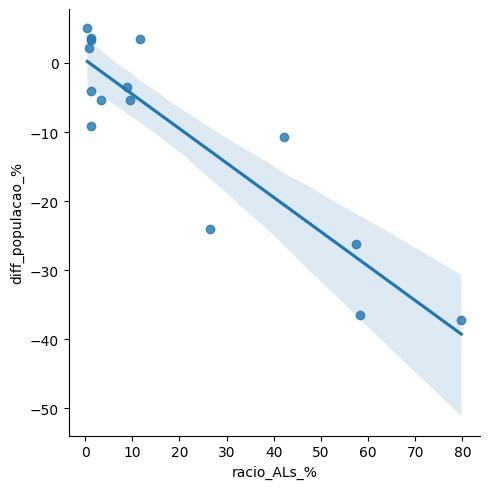

In [213]:
import seaborn as sns
sns.lmplot(x='racio_ALs_%', y='diff_populacao_%', data=reab,fit_reg=True) 

ModuleNotFoundError: No module named 'seaborn'